In [24]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

In [40]:
import math
import numpy as np
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar

In [35]:
def objective(args): # Extend any function with extend to n variables 
    return 10*args[0]**2 + args[1]**2

# derivative of objective function
def derivative(args):
    return np.asarray([20*args[0], 2*args[1]])

# steepest descent algo.
def steepest(objective, derivative, epsilon):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = [1,1]
    # list of changes made to each variable
    change = [0,0]
    # run the gradient descent
    solution_eval = objective(solution)
    
    errors = []
    
    while solution_eval >= epsilon:
        #calculate gradient
        gradient = derivative(solution)
        res = minimize_scalar(lambda alpha: objective([solution[i] - alpha * gradient[i] for i in range(len(solution))]))
        alpha = res.x
        solution = solution - gradient*alpha
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        print(solution, solution_eval)
        errors.append(solution_eval)
    return solutions, errors
  

In [36]:
epsilon = 10**(-5)

In [37]:
solutions = steepest(objective, derivative, epsilon)

[-0.00899101  0.8991009 ] 0.8091908091908092
[0.0735628 0.0735628] 0.05952634233444366
[-0.0006614   0.06614038] 0.004378924465616134
[0.00541149 0.00541149] 0.0003221259483380192
[-4.86547163e-05  4.86547163e-03] 2.3696486981551253e-05
[0.00039808 0.00039808] 1.7431799523263095e-06


In [110]:
res

NameError: name 'res' is not defined

In [13]:
# Plot two-dimensional path
# Plot error vs num iterations

In [61]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()


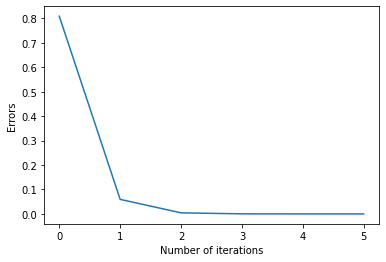

In [62]:
plot_errors_vs_num_iterations(solutions[1])

In [79]:
xaxis

array([], dtype=float64)

In [109]:
plt.figure(figsize=(200,100))

# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
results = objective([x, y])
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample
xs = [arr[0] for arr in solutions[0]]
ys = [arr[1] for arr in solutions[0]]
pyplot.plot(xs, ys, marker='o', color='w', markersize=100)
# show the plot

In [91]:
solutions[0]

array([array([-0.00899101,  0.8991009 ]), array([0.0735628, 0.0735628]),
       array([-0.0006614 ,  0.06614038]), array([0.00541149, 0.00541149]),
       array([-4.86547163e-05,  4.86547163e-03]),
       array([0.00039808, 0.00039808])], dtype=object)

In [97]:
sols[:,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [98]:
xs = [arr[0] for arr in solutions[0]]

In [99]:
xs

[-0.00899100899100902,
 0.07356280083552832,
 -0.0006614038037161263,
 0.0054114856667681725,
 -4.865471628464745e-05,
 0.00039808404232891597]

In [100]:
ys = [arr[1] for arr in solutions[0]]

In [101]:
ys

[0.8991008991008991,
 0.07356280083552824,
 0.0661403803716038,
 0.0054114856667689185,
 0.004865471628463561,
 0.0003980840423290135]